### Exploratory Data Analysis (EDA)
- EDA is a process of analyzing the datasets to summarize their main features using
numerical and visual methods

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

We shall use the `k-circlemartsales` dataset. The data description is as follows:

**Item_Identifier:** Unique product ID assigned to every distinct item

**Item_Weight:** Weight of the product

**Item_Fat_Content:** Describes whether the product is low in fat or not

**Item_Visibility:** Total display area allocated to the particular product (in %)

**Item_Type:** Describes the food category to which the item belongs

**Item_MRP:** Maximum Retail Price (list price) of the product

**Outlet_Identifier:** Unique store ID assigned. It consists of an alphanumeric string of length 6

**Outlet_Establishment_Year:** The establishment year of the store

**Outlet_Size:** Size of the store in terms of ground area covered

**Outlet_Location_Type:** Size of the city in which the store is located

**Outlet_Type:** Is the outlet just a grocery store or a supermarket

**Profit:** Profit of the item sold (in %)

**Item_Outlet_Sales**: Sales of the product (target variable)

In [3]:
sns.load_dataset("titanic").head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Missing Value Treatment

In [4]:
# read the data
df_sales = pd.read_csv("k-circlesales-cleaned.csv")

# check first five rows of data
df_sales.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [5]:
df_sales.shape

(8523, 14)

In [6]:
df_sales.isnull().sum()

Unnamed: 0                      0
Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [7]:
#finding the percentage of null values in each column
df_sales.isnull().sum()/len(df_sales)*100

Unnamed: 0                    0.000000
Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

<a id="summary"></a>
## 1. Data Summary

Let us first check the summary of the dataset

In [8]:
# summary of all the variable in the dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                7774 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                6113 non-null   object 
 10  Outlet_Location_Type       6473 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
 13  Profit                     8523 non-null   float

**The statistical summary of numeric variables:**

In [9]:
df_sales.describe()

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8523.000000,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,4261.000000,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,2460.522505,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,2130.500000,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,4261.000000,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,6391.500000,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,8522.000000,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


**Interpretation:** The variable representing the weight of the product sold has a minimum of 0, which is absurd. It implies the data has missing values where the value `0` is present. For a numeric variable, python does not consider the `0` value as a missing value. <br>
Also, for the variable representing item visibility, has minimum value zero. It indicates that the variable has missing data. A customer needs to know the product before purchase.

In [10]:
df_sales.describe(include = "object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,3,8,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,2793,2793,5577


**Interpretation:** Note that the variables representing outlet size and type of outlet location have counts less than 8523 (the number of observations in the data). It implies that there are missing values in the two variables.

In [11]:
missing_values = df_sales.isnull().sum()

# print the missing values
missing_values

Unnamed: 0                      0
Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

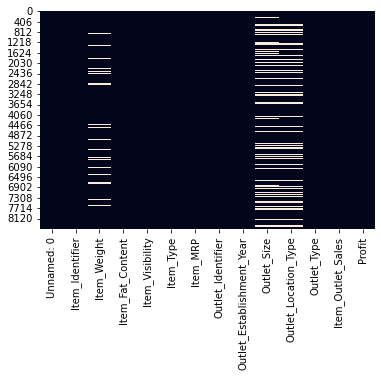

In [12]:
sns.heatmap(df_sales.isnull(), cbar = False);

We see that there are three variables that have missing data. Let us find the percentage of missing data in each variable. Also note that, we have seen variable `Item_Visibility` has missing values represented by 0, and are not detected by python.

**Interpretation:** The variable representing the outlet size has 28.2% missing data. 

If more than 70% of the data is missing we exclude the column from further analysis. You may take your own decision to exclude a column based on the percentage of missing values.

### Dropping

In [13]:
df_sales.shape

(8523, 14)

In [14]:
# drop the rows having missing values
df_sales_drop = df_sales.dropna()

# display the dataframe
df_sales_drop.shape

(5364, 14)

**Interpretation:** There are only 5364 rows in the resultant data, that is nearly 63% of the data. The remaining 37% of the data is lost. 

In order to avoid such a loss of data, we will consider each variable separately and impute the missing values.

In [15]:
# make a copy of the dataframe so that we can use it afterwards if required
df_sales2 = df_sales.copy()

In [16]:
df_sales2.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


# 1. Missing value Treatment

### Let us now consider each variable separately for missing value treatment

### 1. The variable `Outlet_Size`:

The variable is a categorical variable representing the size of the store in terms of ground area covered.

In [17]:
# check the number of null values
df_sales.Outlet_Size.isnull().sum()

2410

There are 2410 missing values detected by python.

In [18]:
# check the count of the data
df_sales.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
df_sales.dtypes

Unnamed: 0                     int64
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Profit                       float64
dtype: object

**Note the missing values are detected by python.**

In [20]:
# check the head of the column
df_sales.Outlet_Size.head(10)

0    Medium
1    Medium
2    Medium
3       NaN
4      High
5    Medium
6      High
7    Medium
8       NaN
9       NaN
Name: Outlet_Size, dtype: object

The `NaN` values are read as missing values in the data.

**We shall replace the missing values with mode value.** <br><br>
The mode value is the value in the data having the highest frequency. 

In [21]:
# obtain the mode value
df_sales.Outlet_Size.mode()

0    Medium
dtype: object

**Interpretation:** The mode value of the data is 'Medium'. We will now impute all the missing values with it.

In [22]:
# import the library numpy as np
import numpy as np

# replace all the missing values with 'Medium'
df_sales.Outlet_Size.replace(np.NaN,"Medium")

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [23]:
df_sales.Outlet_Size.fillna("Medium",inplace=True)

The missing values have been replaced and let us do a recheck for the same.

In [24]:
df_sales.Outlet_Size.isnull().sum()

0

**Interpretation:** There are no more missing values in the data.

In [25]:
# check the count of the data
df_sales.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**Interpretation:** The count of the medium values has risen drastically since all the missing values were assigned as 'Medium'

### 2. The variable `Outlet_Location_Type`:

The variable `Outlet_Location_Type` represents the size of the city in which the store is located. We have already seen that the data has missing values. 

Let us find out the number of missing values.

In [26]:
# obtain the total number of missing values
# notnull(): detects the existing (non-missing) values
# sum(): gives the total count of the existing (non-missing) values
df_sales.Outlet_Location_Type.isnull().sum()

2050

**Interpretation:** There are 2050 missing values.

To find the categories in the data use value_counts()

In [138]:
# check the count of the categories
df_sales.Outlet_Location_Type.value_counts()

Tier1     3947
Tier 2    3483
Tier 3    1093
Name: Outlet_Location_Type, dtype: int64

**Interpretation:** There are some non-standard missing values present. These values are considered as categories in the data. They need to be replaced with standard missing values.

**There are missing values python detects. These values are `NaN` and blank space ` `.** 

The values `?`, `--`, `-`, `na`, `NAN` resemble missing values. However, they are not detected by python. We need to replace these values with NAN

In [28]:
# replace "?" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df_sales.Outlet_Location_Type.replace(to_replace = "?", value = np.NaN, inplace = True)

# replace " --" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df_sales.Outlet_Location_Type.replace(to_replace = "  --", value = np.NaN, inplace = True)

# replace " -" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df_sales.Outlet_Location_Type.replace(to_replace = "  -", value = np.NaN, inplace = True)

# replace "na" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df_sales.Outlet_Location_Type.replace(to_replace = "na", value = np.NaN, inplace = True)

# replace "NAN" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df_sales.Outlet_Location_Type.replace(to_replace = "NAN", value = np.NaN, inplace = True)

**Interpretation:** The values are now replaced. We can check for the same by displaying the count of each category. 

In [29]:
# check the count of the data
df_sales.Outlet_Location_Type.value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

Now, check for the count of missing values.

In [30]:
# check the count of the missing data
df_sales.Outlet_Location_Type.isnull().sum()

2410

**Interpretation:**  In all we now have 2410 missing values.

We shall replace the missing values based on the year of establishment and outlet_sales

In [1]:
df_sales.head()

NameError: name 'df_sales' is not defined

In [31]:
df_sales[["Item_Outlet_Sales","Outlet_Location_Type"]].head()

,Item_Outlet_Sales,Outlet_Location_Type
0,3735.1380,Tier 2
1,443.4228,Tier 2
2,2097.2700,Tier 2
3,732.3800,NaN
4,994.7052,Tier 3


In [32]:
# consider the variables Item_Outlet_Sales and Outlet_Location_Type
# dropna(): drops rows having missing value
df_impute = df_sales[["Item_Outlet_Sales","Outlet_Location_Type"]].dropna()


# group the data by the location type
# mean(): returns the mean of the values
df_impute = df_impute.groupby(df_impute["Outlet_Location_Type"]).mean()

# display the dataframe
df_impute

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2681.603542
Tier 3,2298.995256
Tier1,1912.149161


In [33]:
# consider the variables Item_Outlet_Sales and Outlet_Location_Type
# dropna(): drops rows having missing value
df_impute = df_sales[["Item_Outlet_Sales","Outlet_Location_Type"]]


# group the data by the location type
# mean(): returns the mean of the values
df_impute = df_impute.groupby(df_impute["Outlet_Location_Type"]).mean()

# display the dataframe
df_impute

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2681.603542
Tier 3,2298.995256
Tier1,1912.149161


Based on the above outlet sales range we shall impute the sales in the data.

In [34]:
df_sales.Outlet_Location_Type

0       Tier 2
1       Tier 2
2       Tier 2
3          NaN
4       Tier 3
         ...  
8518    Tier 3
8519       NaN
8520     Tier1
8521    Tier 2
8522     Tier1
Name: Outlet_Location_Type, Length: 8523, dtype: object

In [35]:
df_sales.Outlet_Location_Type[df_sales.Outlet_Location_Type.isnull()]

3       NaN
8       NaN
9       NaN
25      NaN
28      NaN
       ... 
8502    NaN
8508    NaN
8509    NaN
8514    NaN
8519    NaN
Name: Outlet_Location_Type, Length: 2410, dtype: object

In [36]:
# create a variable 'ind' for all the indexes having missing data
index = np.where(df_sales.Outlet_Location_Type.isnull())[0]
index

array([   3,    8,    9, ..., 8509, 8514, 8519], dtype=int64)

In [37]:
# impute the values using a for loop
for ind in index:                                               # for the rows containing missing data
    if df_sales.loc[ind,"Item_Outlet_Sales"] <= 2100:           # if the sales is less than 2100 for the location
        df_sales.loc[ind,"Outlet_Location_Type"] = "Tier1"      # impute the value "Tier1"
    elif df_sales.loc[ind,"Item_Outlet_Sales"] >= 2500:         # if the sales is more than 2500 for the location
        df_sales.loc[ind,"Outlet_Location_Type"] = "Tier 2"     # impute the value "Tier 2"
    else:                                                       # if both the if conditions fail
        df_sales.loc[ind,"Outlet_Location_Type"] = "Tier 3"     # impute the value "Tier 3"

In [38]:
# re-check the count of the missing data
df_sales.Outlet_Location_Type.isnull().sum()

0

In [39]:
df_sales.Outlet_Location_Type.value_counts()

Tier1     3947
Tier 2    3483
Tier 3    1093
Name: Outlet_Location_Type, dtype: int64

Now check for the counts of the data.

In [40]:
df_sales["Outlet_Location_Type"].value_counts()

Tier1     3947
Tier 2    3483
Tier 3    1093
Name: Outlet_Location_Type, dtype: int64

### 3. The variable `Item_Weight`:

In [41]:
# display the summary 
df_sales["Item_Weight"].describe()

count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64

**Interpretation:** We see the minimum weight in the data is given to be zero. The weight of any item can not be zero.

In [42]:
# replace the value of 0 with NaN
df_sales.Item_Weight.replace(0,np.NaN, inplace = True)

Display the data summary again.

In [43]:
# display the summary 
df_sales["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

We need to impute these values. We shall see two ways to do so. Once we will impute the missing data with mean and then with the median.

In [44]:
df_sales["Item_Weight"].isnull().sum()

1463

In [45]:
mu = df_sales["Item_Weight"].mean()
me = df_sales["Item_Weight"].median()
mu,me

(12.857645184136183, 12.6)

In [46]:
df_sales["Item_Weight"].fillna(me, inplace = True)

In [47]:
df_sales["Item_Weight"].isnull().sum()

0

### 4. The variable `Item_Visibility`:

The variable represents the item visibility in the score.

In [48]:
# display the summary 
df_sales["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

### We have imputed for all the missing values in the data. 

We will now do a recheck of the missing data.

In [49]:
# use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df_sales.isnull().sum()

# print the missing values
missing_values

Unnamed: 0                   0
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

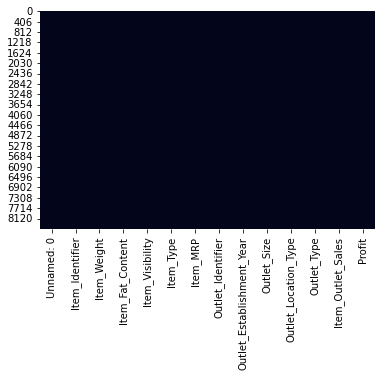

In [50]:
sns.heatmap(df_sales.isnull(), cbar = False)
plt.show()

### Null value imputation by `ffill` and `bfill`

We will use the dataframe `df_sales2` that we created as a backup earlier

In [51]:
df_sales2.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [52]:
# replace the value of 0 with NaN
df_sales2.Item_Weight.replace(0,np.NaN, inplace = True)

In [53]:
# check the null values in each column
df_sales2.isnull().sum()

Unnamed: 0                      0
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

#### Select random observations containing null values to see the change after bfill or ffill

In [54]:
df_sales2[['Item_Weight', 'Outlet_Size', 'Outlet_Location_Type']].iloc[30:45]

,Item_Weight,Outlet_Size,Outlet_Location_Type
30,19.25,NaN,NaN
31,18.60,Medium,Tier 2
32,18.70,Medium,Tier 2
33,17.85,NaN,NaN
34,17.50,Small,Tier1
35,10.00,Medium,Tier 2
36,NaN,Medium,Tier 2
37,8.85,Medium,Tier 2
38,NaN,Medium,Tier 2
39,NaN,Medium,Tier 2


### bfill()

In [55]:
# bfill() is used to backward fill the missing values in the dataset
# axis = 'rows': the value in the Null value cell is filled from the corresponding value in the next row
df_bfill_rows = df_sales2.bfill(axis = 'rows')
df_bfill_rows[['Item_Weight', 'Outlet_Size', 'Outlet_Location_Type']].iloc[30:45]

,Item_Weight,Outlet_Size,Outlet_Location_Type
30,19.25,Medium,Tier 2
31,18.60,Medium,Tier 2
32,18.70,Medium,Tier 2
33,17.85,Small,Tier1
34,17.50,Small,Tier1
35,10.00,Medium,Tier 2
36,8.85,Medium,Tier 2
37,8.85,Medium,Tier 2
38,13.35,Medium,Tier 2
39,13.35,Medium,Tier 2


In [56]:
# check the null values in each column
df_bfill_rows.isnull().sum()

Unnamed: 0                   0
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

#### Note: If the next corresponding row is also null, then the previous cell with the null value will not be imputed.

In [57]:
# bfill() is used to backward fill the missing values in the dataset
# axis = 'columns': the value in the Null value cell is filled from the corresponding value in the next column
df_bfill_columns = df_sales2.bfill(axis = 'columns')
df_bfill_columns.iloc[30:40]

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
30,30,FDV38,19.25,Low Fat,0.170349,Dairy,55.8,OUT010,1998,Grocery Store,Grocery Store,Grocery Store,163.7868,11.7
31,31,NCS17,18.6,Low Fat,0.080829,Health and Hygiene,96.4,OUT018,2009,Medium,Tier 2,Supermarket Type2,2741.7644,13.4
32,32,FDP33,18.7,Low Fat,0.0,Snack Foods,256.7,OUT018,2009,Medium,Tier 2,Supermarket Type2,3068.0064,14.3
33,33,FDO23,17.85,Low Fat,0.0,Breads,93.1,OUT045,2002,Supermarket Type1,Supermarket Type1,Supermarket Type1,2174.5028,11.7
34,34,DRH01,17.5,Low Fat,0.097904,Soft Drinks,174.9,OUT046,1997,Small,Tier1,Supermarket Type1,2085.2856,14.3
35,35,NCX29,10.0,Low Fat,0.089291,Health and Hygiene,146.7,OUT049,1999,Medium,Tier 2,Supermarket Type1,3791.0652,14.0
36,36,FDV20,Regular,Regular,0.059512,Fruits and Vegetables,128.1,OUT027,1985,Medium,Tier 2,Supermarket Type3,2797.6916,12.4
37,37,DRZ11,8.85,Regular,0.113124,Soft Drinks,122.5,OUT018,2009,Medium,Tier 2,Supermarket Type2,1609.9044,14.3
38,38,FDX10,Regular,Regular,0.123111,Snack Foods,37.0,OUT027,1985,Medium,Tier 2,Supermarket Type3,388.1614,14.3
39,39,FDB34,Low Fat,Low Fat,0.026481,Snack Foods,87.6,OUT027,1985,Medium,Tier 2,Supermarket Type3,2180.495,14.6


In [58]:
df_bfill_columns[['Item_Weight', 'Outlet_Size', 'Outlet_Location_Type']].iloc[30:40]

,Item_Weight,Outlet_Size,Outlet_Location_Type
30,19.25,Grocery Store,Grocery Store
31,18.6,Medium,Tier 2
32,18.7,Medium,Tier 2
33,17.85,Supermarket Type1,Supermarket Type1
34,17.5,Small,Tier1
35,10.0,Medium,Tier 2
36,Regular,Medium,Tier 2
37,8.85,Medium,Tier 2
38,Regular,Medium,Tier 2
39,Low Fat,Medium,Tier 2


#### In our case we cannot use bfill or ffill with axis = 'columns' because data in each column is different and has an uncommon data type.

#### Note: If the next corresponding column is also null, then the previous cell with the null value will not be imputed.

### ffill()

In [59]:
# ffill() is used to forward fill the missing values in the dataset
# axis = 'rows': the value in the Null value cell is filled from the corresponding value in the previous row
df_ffill_rows = df_sales2.ffill(axis = 'rows')

# looking only at the columns with null values to visualize the changes clearly
df_ffill_rows[['Item_Weight', 'Outlet_Size', 'Outlet_Location_Type']].iloc[30:40]

,Item_Weight,Outlet_Size,Outlet_Location_Type
30,19.25,Small,Tier1
31,18.60,Medium,Tier 2
32,18.70,Medium,Tier 2
33,17.85,Medium,Tier 2
34,17.50,Small,Tier1
35,10.00,Medium,Tier 2
36,10.00,Medium,Tier 2
37,8.85,Medium,Tier 2
38,8.85,Medium,Tier 2
39,8.85,Medium,Tier 2


In [60]:
# ffill() is used to forward fill the missing values in the dataset
# axis = 'columns': the value in the Null value cell is filled from the corresponding value in the previous row
df_ffill_columns = df_sales2.ffill(axis = 'columns')

# looking only at the columns with null values to visualize the changes clearly
df_ffill_columns.iloc[30:40]

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
30,30,FDV38,19.25,Low Fat,0.170349,Dairy,55.8,OUT010,1998,1998,1998,Grocery Store,163.7868,11.7
31,31,NCS17,18.6,Low Fat,0.080829,Health and Hygiene,96.4,OUT018,2009,Medium,Tier 2,Supermarket Type2,2741.7644,13.4
32,32,FDP33,18.7,Low Fat,0.0,Snack Foods,256.7,OUT018,2009,Medium,Tier 2,Supermarket Type2,3068.0064,14.3
33,33,FDO23,17.85,Low Fat,0.0,Breads,93.1,OUT045,2002,2002,2002,Supermarket Type1,2174.5028,11.7
34,34,DRH01,17.5,Low Fat,0.097904,Soft Drinks,174.9,OUT046,1997,Small,Tier1,Supermarket Type1,2085.2856,14.3
35,35,NCX29,10.0,Low Fat,0.089291,Health and Hygiene,146.7,OUT049,1999,Medium,Tier 2,Supermarket Type1,3791.0652,14.0
36,36,FDV20,FDV20,Regular,0.059512,Fruits and Vegetables,128.1,OUT027,1985,Medium,Tier 2,Supermarket Type3,2797.6916,12.4
37,37,DRZ11,8.85,Regular,0.113124,Soft Drinks,122.5,OUT018,2009,Medium,Tier 2,Supermarket Type2,1609.9044,14.3
38,38,FDX10,FDX10,Regular,0.123111,Snack Foods,37.0,OUT027,1985,Medium,Tier 2,Supermarket Type3,388.1614,14.3
39,39,FDB34,FDB34,Low Fat,0.026481,Snack Foods,87.6,OUT027,1985,Medium,Tier 2,Supermarket Type3,2180.495,14.6


#### In our case we cannot use bfill or ffill with axis = 'columns' because data in each column is different and has an uncommon data type.

<a id="outliers"></a>
# 2. Outliers Treatment

An outlier is an observation in the data that lies at an abnormal distance from other values. Presence of an outlier may skew the results. Hence it is necessary to remove them.

In [61]:
df_sales.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [62]:
#seperating the numerical and categorical columns
df_num=df_sales.select_dtypes(include=np.number)
df_num.shape

(8523, 7)

- df_int=df_sales.select_dtypes(include=int)
- df_int.shape

- df_float=df_sales.select_dtypes(include=float)
- df_float.shape

In [63]:
df_sales.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [64]:
df_num.head()

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,0,9.30,0.016047,249.8,1999,3735.1380,11.5
1,1,5.92,0.019278,48.3,2009,443.4228,14.3
2,2,17.50,0.016760,141.6,1999,2097.2700,14.5
3,3,19.20,0.000000,182.1,1998,732.3800,13.6
4,4,8.93,0.000000,53.9,1987,994.7052,14.1


In [65]:
df_num.columns

Index(['Unnamed: 0', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')

In [66]:
df_num["Unnamed: 0"].value_counts()

0       1
5677    1
5691    1
5690    1
5689    1
       ..
2835    1
2834    1
2833    1
2832    1
8522    1
Name: Unnamed: 0, Length: 8523, dtype: int64

In [67]:
df_num["Unnamed: 0"].unique()

array([   0,    1,    2, ..., 8520, 8521, 8522], dtype=int64)

In [68]:
df_num.shape

(8523, 7)

In [69]:
#droping unnamed column as it defines the zero
df_num.drop("Unnamed: 0",axis=1,inplace=True)

In [70]:
df_num.shape

(8523, 6)

In [71]:
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,9.30,0.016047,249.8,1999,3735.1380,11.5
1,5.92,0.019278,48.3,2009,443.4228,14.3
2,17.50,0.016760,141.6,1999,2097.2700,14.5
3,19.20,0.000000,182.1,1998,732.3800,13.6
4,8.93,0.000000,53.9,1987,994.7052,14.1


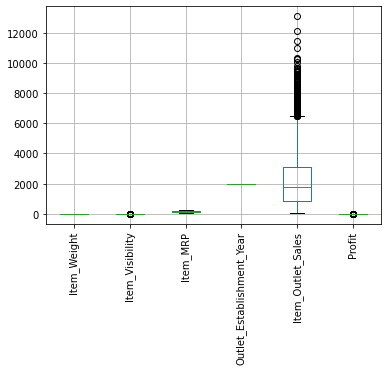

In [72]:
df_num.boxplot()
plt.xticks(rotation=90);

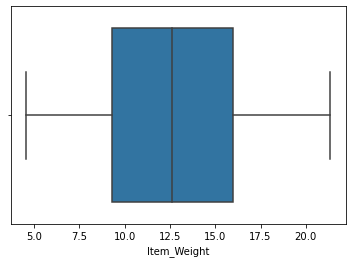

In [73]:
#checking outliers
sns.boxplot(df_num.Item_Weight);

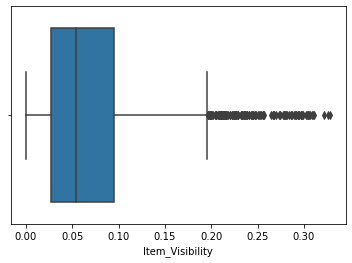

In [74]:
sns.boxplot(df_num.Item_Visibility);

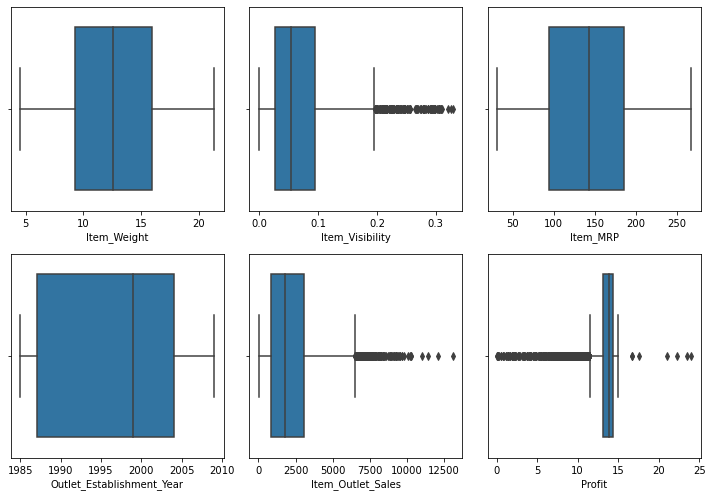

In [75]:
#instead of visualzing for every single variables, we are using for loop 
c=1
plt.figure(figsize=(10,10))
for i in df_num.columns:
    plt.subplot(3,3,c)
    sns.boxplot(df_num[i])
    plt.tight_layout()
    c+=1

## IQR method 

The IQR method can be used when the data distribution in non-normal. Also the quartiles are less affected by the extreme values.

In [76]:
q1= df_num.quantile(0.25)
q3 = df_num.quantile(0.75)
iqr=q3-q1

In [77]:
#setting the upper limit and lower limit
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit["Item_Weight"]

26.035

In [78]:
lower_limit

Item_Weight                    -0.725000
Item_Visibility                -0.074404
Item_MRP                      -43.975000
Outlet_Establishment_Year    1961.500000
Item_Outlet_Sales           -2566.326100
Profit                         11.425000
dtype: float64

In [79]:
upper_limit["Item_Weight"],lower_limit["Item_Weight"]

(26.035, -0.7249999999999996)

In [80]:
#using for loop to treat outliers for every column
for i in df_num.columns:
    q1=df_num[i].quantile(0.25)
    q3=df_num[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    df_num[i]=np.where(df_num[i]>upper,upper,np.where(df_num[i]<lower,lower,df_num[i]))

### Plots after treatment

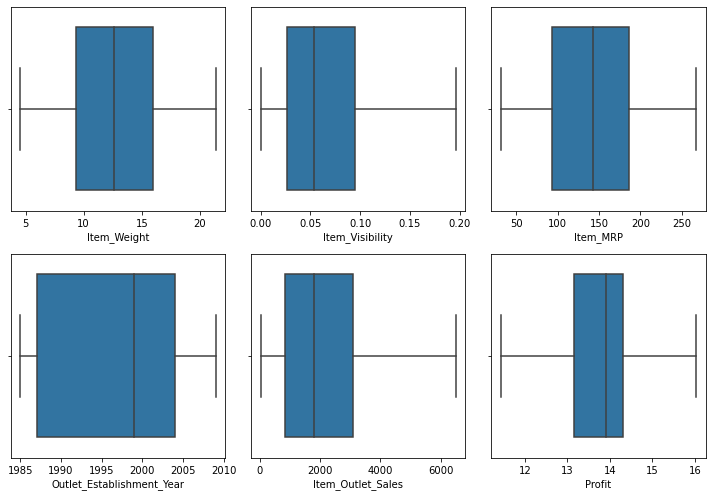

In [81]:
c=1
plt.figure(figsize=(10,10))
for i in df_num.columns:
    plt.subplot(3,3,c)
    sns.boxplot(df_num[i])
    plt.tight_layout()
    c+=1

<a id="zscore"></a>
##  Z-score

- Z-score of a value is the difference between that value and the mean, divided by the standard deviation. 
- If the z-score greater than 3 or less than -3, indicates an outlier value. 
- This method is useful when the data distribution is normal. 

- This method has a disadvantage that the values of mean and standard deviation are highly affected by the presence of outliers.

In [82]:
df_num1=df_sales.select_dtypes(include=np.number)

In [83]:
df_num1.head()

,Unnamed: 0,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,0,9.30,0.016047,249.8,1999,3735.1380,11.5
1,1,5.92,0.019278,48.3,2009,443.4228,14.3
2,2,17.50,0.016760,141.6,1999,2097.2700,14.5
3,3,19.20,0.000000,182.1,1998,732.3800,13.6
4,4,8.93,0.000000,53.9,1987,994.7052,14.1


In [84]:
from scipy import stats

In [85]:
z_scores_Profit =stats.zscore(df_num1["Profit"])
z_scores_Profit

0      -1.125033
1       0.520342
2       0.637869
3       0.108998
4       0.402815
          ...   
8518    0.402815
8519    0.461578
8520   -2.300301
8521    0.461578
8522    0.696632
Name: Profit, Length: 8523, dtype: float64

In [86]:
#checking for values less than -3
row_index_less = np.where(z_scores_Profit < -3)

# print the values
print(row_index_less)
#where will give the index position

(array([  41,   50,  144,  217,  320,  324,  406,  425,  432,  457,  546,
        602,  607,  611,  641,  716,  761,  816,  892,  921,  926,  957,
        960,  986, 1066, 1133, 1178, 1212, 1237, 1304, 1409, 1459, 1533,
       1551, 1561, 1582, 1623, 1645, 1649, 1659, 1669, 1715, 1784, 1788,
       1805, 1816, 1835, 1867, 1893, 1900, 1916, 1956, 1974, 1984, 1989,
       2000, 2019, 2060, 2062, 2130, 2201, 2224, 2246, 2289, 2332, 2338,
       2425, 2449, 2477, 2510, 2515, 2526, 2537, 2543, 2572, 2636, 2792,
       2836, 2919, 2925, 2969, 2987, 2992, 2996, 3025, 3035, 3098, 3105,
       3223, 3254, 3296, 3356, 3415, 3416, 3476, 3513, 3619, 3668, 3675,
       3759, 3785, 3849, 3852, 3904, 3917, 3932, 3936, 3990, 4073, 4091,
       4146, 4197, 4213, 4407, 4487, 4493, 4556, 4571, 4705, 4721, 4724,
       4764, 4800, 5049, 5127, 5231, 5274, 5286, 5313, 5336, 5378, 5516,
       5540, 5657, 5658, 5728, 5730, 5750, 5788, 5883, 5891, 5906, 5971,
       5987, 6093, 6137, 6211, 6247, 6271, 6372, 6

**Interpretation:** The rows corresponding to the above displayed index are the outliers for the data.

In [87]:
# print the rows where z-score is more than 3
row_index_more = np.where(z_scores_Profit > 3)

# print the values more than the 
print(row_index_more)

(array([3026, 4386, 5089, 8369], dtype=int64),)


In [88]:
z_scores_Profit<-3

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Profit, Length: 8523, dtype: bool

In [89]:
z_scores_Profit[z_scores_Profit<-3]

41     -3.828149
50     -3.534332
144    -3.358042
217    -6.002394
320    -7.765296
          ...   
8376   -4.063202
8395   -3.710622
8429   -5.473524
8433   -7.824059
8456   -3.005461
Name: Profit, Length: 195, dtype: float64

In [90]:
z_scores_Profit[z_scores_Profit>3]

3026    6.220390
4386    5.162649
5089    4.457489
8369    5.926573
Name: Profit, dtype: float64

In [91]:
df_sales.shape

(8523, 14)

In [92]:
#dropping the all the rows with the index

In [93]:
z_scores_Profit =stats.zscore(df_num1["Profit"])
z_scores_Profit.head()

0   -1.125033
1    0.520342
2    0.637869
3    0.108998
4    0.402815
Name: Profit, dtype: float64

In [94]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
df_sales_zscore = df_sales["Profit"][~(( z_scores_Profit < -3) |(z_scores_Profit > 3))]

In [95]:
df_sales_zscore.shape

(8324,)

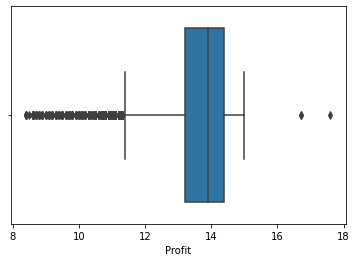

In [96]:
sns.boxplot(df_sales_zscore);

### Encoding Techniques
- N-1 Dummy encoding
- One-hot encoding
- Label encoding
- Ordinal encoding
- Frequency encoding
- Target encoding

<a id="cat"> </a>
# 3. Handle Non-Numeric Data

The data may contain numerical as well as categorical variables. Machine learning algorithms are designed to work with numerical data. Thus, it is necessary to convert the categorical variables into a numeric type. Different techniques are available to perform such conversion.

<a id="pandas"> </a>
## 3.1 One-Hot Encoding (Using Pandas)

It is used to create dummy variables from a single categorical variable. We can create a dummy variable corresponding to each level of the categorical variable. The dummy variable contains values as '0' and '1' based on the presence or absence of the category in the corresponding observation.

In [97]:
df_cat=df_sales.select_dtypes(include=object)
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 2,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 2,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier1,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [98]:
len(df_cat.Item_Type.value_counts())

16

In [99]:
# check the categories of the variable 'Item_Type' 
print('Categories in Item_Type:', df_sales.Item_Type.unique())

Categories in Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


`Item_Type` is distributed in 16 different categories. To create 16 dummy variables corresponding to each category, perform one-hot encoding using `get_dummies` from pandas.

In [100]:
# create dummy variables for 'Item_Type'
pd.get_dummies(df_sales, columns= ['Item_Type']).head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0,FDA15,9.30,Low Fat,0.016047,249.8,OUT049,1999,Medium,Tier 2,...,0,0,0,0,0,0,0,0,0,0
1,1,DRC01,5.92,Regular,0.019278,48.3,OUT018,2009,Medium,Tier 2,...,0,0,0,0,0,0,0,0,1,0
2,2,FDN15,17.50,Low Fat,0.016760,141.6,OUT049,1999,Medium,Tier 2,...,0,0,0,0,1,0,0,0,0,0
3,3,FDX07,19.20,Regular,0.000000,182.1,OUT010,1998,Medium,Tier1,...,1,0,0,0,0,0,0,0,0,0
4,4,NCD19,8.93,Low Fat,0.000000,53.9,OUT013,1987,High,Tier 3,...,0,0,0,1,0,0,0,0,0,0


We have created 16 dummy encoded variables from the categorical variable `Item_Type`. In the $1^{st}$ observation, value '1' is present in the column `Item_Type_Dairy	`, while all other dummy variables have value '0'.

#### We can also create n-1 dummy variables for the 16 categories in `Item_Type` using the `drop_first` parameter.

In [101]:
# create dummy variables for 'Item_Type'
# 'drop_first = True' creates (n-1 = 15) dummy variables from (n = 16) categories 
pd.get_dummies(df_sales, columns= ['Item_Type'], drop_first = True).head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0,FDA15,9.30,Low Fat,0.016047,249.8,OUT049,1999,Medium,Tier 2,...,0,0,0,0,0,0,0,0,0,0
1,1,DRC01,5.92,Regular,0.019278,48.3,OUT018,2009,Medium,Tier 2,...,0,0,0,0,0,0,0,0,1,0
2,2,FDN15,17.50,Low Fat,0.016760,141.6,OUT049,1999,Medium,Tier 2,...,0,0,0,0,1,0,0,0,0,0
3,3,FDX07,19.20,Regular,0.000000,182.1,OUT010,1998,Medium,Tier1,...,1,0,0,0,0,0,0,0,0,0
4,4,NCD19,8.93,Low Fat,0.000000,53.9,OUT013,1987,High,Tier 3,...,0,0,0,1,0,0,0,0,0,0


The above data frame contains 15 dummy variables for 16 categories of `Item_Type`. The 0 indicates non-existance of the item type while 1 indicates existance of the item type.

<a id="onehot"> </a>
## 3.2 One-Hot Encoding (Using Sklearn)

sklearn also provides a function to perform a one-hot encoding of the categorical variable. Let us use 'OneHotEncoder' from skelarn to encode the variable `Outlet_Type`.

In [102]:
df_sales.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [103]:
# import the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
encode = OneHotEncoder()

# fit_transform: It returns a sparse array
# .toarray(): It returns a numpy array
df_encode = pd.DataFrame(encode.fit_transform(df_sales[['Outlet_Type']]).toarray(), columns = ['Grocery Store', 'Supermarket Type1', 
                                                                                         'Supermarket Type2', 'Supermarket Type3'])



# merge with main dataframe (df_sales)
df_encode = pd.concat([df_sales, df_encode], axis=1)

# print 20 rows of the data
df_encode.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,0.0,1.0,0.0,0.0
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,0.0,0.0,1.0,0.0
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,0.0,1.0,0.0,0.0
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1.0,0.0,0.0,0.0
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0.0,1.0,0.0,0.0


<a id="label"> </a>
## 3.3 Label Encoding (Using Sklearn)

This technique labels each of the categories of the variable with values between 0 and (n-1), where 'n' is the number of distinct categories in the variable.

#### Use 'LabelEncoder' from sklearn to encode the variable `Outlet_Size`.

In [104]:
# check the categories in 'Outlet_Size'
df_sales.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [105]:
# we can not perform encoding with the variable which has missing value 
# convert the data type into string
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].astype(str)

Now, the missing values will be considered as a separate category alongside other categories (Medium, High, Small) in the variable.

In [106]:
# import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder on 'Outlet_Size' 
df_sales['Label_Encoded_Outlet_Size'] = labelencoder.fit_transform(df_sales.Outlet_Size)

# display first 5 observations
df_sales.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0


LabelEncoder has encoded the four outlet size. This method is not always useful because it assigns the order to the categories in an alphabetical manner.

<a id="ord"> </a>
## 3.4 Ordinal Encoding (Using Sklearn)

Ordinal encoding can be used to encode the ordinal variable with the values from 0 to (n-1) for 'n' distinct categories. We can pass the order to the encoder to assign the categories in the variable. We encode the variable `Outlet_Size` using OrdinalEncoder.

In [107]:
# import the OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# instantiate the encoder with the list of categories in the required order
orderencoding = OrdinalEncoder(categories = [["Small", "Medium", "High", "nan"]])

# add a column of ordered labels
# reshape(-1, 1): to rearrange the data
df_sales['Order_Outlet_Size'] = orderencoding.fit_transform(df_sales['Outlet_Size'].values.reshape(-1,1))

# display the data
df_sales.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size,Order_Outlet_Size
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1,1.0
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1,1.0
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1,1.0
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1,1.0
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0,2.0


<a id="freq"> </a>
## 3.5 Frequency Encoding (Using Sklearn)

Frequency encoding is used to encode the values with the frequency of each category of the categorical variable. This method is not useful if the categories have the same frequency; as the encoded column will contain the same value for all the observations. 

#### Encode the variable `Item_Type` with the frequency of each category.

In [108]:
# frequency encoding on 'Item_Type'
# size of each category
encoding = df_sales.groupby('Item_Type').size()

# get frequency of each category
encoding = encoding/len(df_sales)

# encode the column
# map(): apply encoding to each item in the variable
# and multiply by 100
df_sales['Freq_Encoded_Item_Type'] = df_sales.Item_Type.map(encoding)*100

# print first five rows of the data
df_sales.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Label_Encoded_Outlet_Size,Order_Outlet_Size,Freq_Encoded_Item_Type
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,1,1.0,8.001877
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,1,1.0,5.221166
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,1,1.0,4.986507
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier1,Grocery Store,732.3800,13.6,1,1.0,14.455004
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0,2.0,10.676992


In [109]:
# create a dataframe for 'Item_Type' and its corresponding frequency encoding
# .unique(): to get the unique values
pd.DataFrame(df_sales['Item_Type'].unique(), df_sales['Freq_Encoded_Item_Type'].unique(), columns= ['Item_Type'])

,Item_Type
8.001877,Dairy
5.221166,Soft Drinks
4.986507,Meat
14.455004,Fruits and Vegetables
10.676992,Household
7.602957,Baking Goods
14.079549,Snack Foods
10.043412,Frozen Foods
1.290625,Breakfast
6.101138,Health and Hygiene


**Interpretation:** From the above result,for all categories in the variable we get the percentage of occurrence for that specific category.
The 'Fruits and Vegetables', 'Household', 'Snack Foods', and 'Frozen Foods' have the highest proportion among all the products.

<a id="norm"> </a>
# 4. Scale the Data

The data may contain the variables of the different numerical scale. We scale the variable to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others. Here, we study two techniques to normalize the data.
               

<a id="stdscale"> </a>
## 4.1 StandardScaler

The StandardScaler() is present in the sklearn library that normalizes the data such that the mean is zero and standard deviation is 1. This method does not change the shape of the original distribution.

Check the minimum and maximum values of the product sales.

In [110]:
# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",df_sales['Item_Outlet_Sales'].min(),"\n",
      "The maximum value of the sales:", df_sales['Item_Outlet_Sales'].max())

 The minimum value of the sales: 33.29 
 The maximum value of the sales: 13086.9648


Standardize the variable to reduce the scale of the data.

In [111]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
df_sales['Scaled_Item_Outlet_Sales'] = standard_scale.fit_transform(df_sales[['Item_Outlet_Sales']])

# calculate the minimum and maximum values of the variable
print(" The minimum value of the sales:",df_sales['Scaled_Item_Outlet_Sales'].min(),"\n",
      "The maximum value of the sales:", df_sales['Scaled_Item_Outlet_Sales'].max())

 The minimum value of the sales: -1.2587901671720854 
 The maximum value of the sales: 6.391044932769205


Plot the distribution plots to visualize the data.

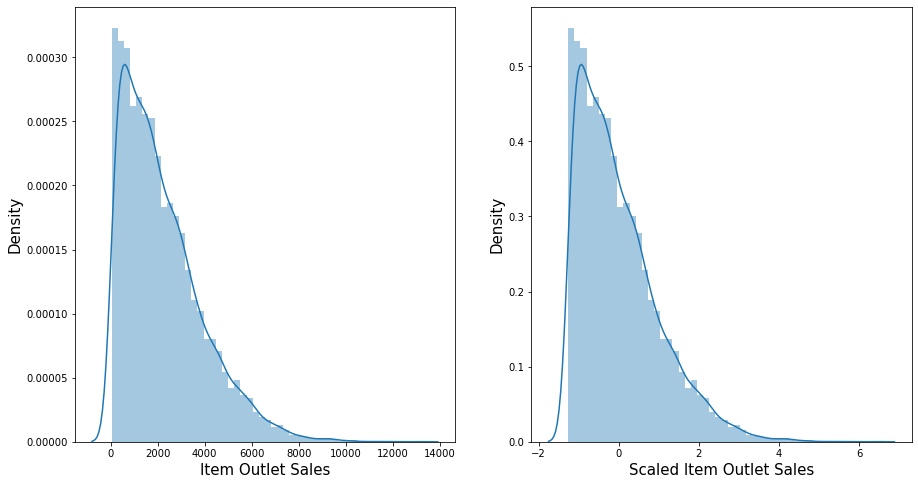

In [112]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
plt.subplot(1,2,1)

# plot the distribution of original variable
# axlabel: label the x-axis
sns.distplot(df_sales['Item_Outlet_Sales'])
# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Item Outlet Sales', fontsize=15)

# we create a subplot of 1 row by 2 columns
# use second column for plotting
plt.subplot(1,2,2)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.distplot(df_sales['Scaled_Item_Outlet_Sales'])
# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Scaled Item Outlet Sales', fontsize=15)
# display the plot
plt.show()

**Interpretation:** The above subplots show that the distribution of the scaled and unscaled data is the same. But, the range of values is changed from (33.29, 13086.96) to (-1.26, 6.39).

Check the mean and standard deviation of the scaled data.

In [113]:
# check the mean and standard deviation of the scaled variable
print("The mean of the scaled variable:", df_sales['Scaled_Item_Outlet_Sales'].mean(),"\n",
      "The standard deviation of the scaled variable:", df_sales['Scaled_Item_Outlet_Sales'].std())

The mean of the scaled variable: 1.6488563939581405e-16 
 The standard deviation of the scaled variable: 1.0000586699522322


**Interpretation:** It shows that the transformed data has mean = 0 and standard deviation = 1

<a id="minmax"> </a>
## 4.2 Min-Max Normalization

Min-max normalization is another method to normalize the data. It performs a linear transformation on the data. The normalized values will be between 0 and 1. Use the 'MinMaxScaler' from sklearn to normalize the variable.

In [114]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the MinMaxScaler
min_max = MinMaxScaler()

# fit the MinMaxScaler
df_sales['minmax_Item_Outlet_Sales'] = min_max.fit_transform(df_sales[['Item_Outlet_Sales']])

# minimum and maximum value of the normalized variable
df_sales['minmax_Item_Outlet_Sales'].min(), df_sales['minmax_Item_Outlet_Sales'].max()

(0.0, 1.0)

**Interpretation:** The range of `Item_Outlet_Sales` has changed from (33.29, 13086.9648) to (0,1).

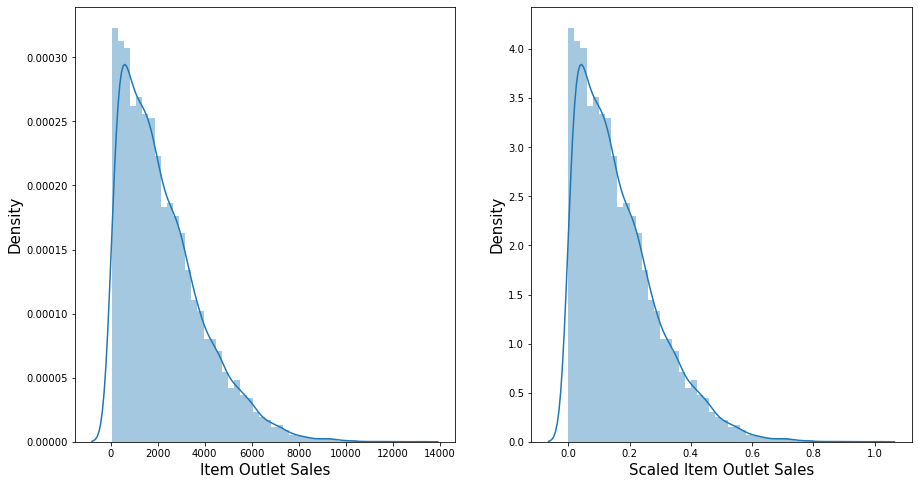

In [115]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# subplot is used to create a set of plots
# we create a subplot of 1 row by 2 columns
# use first column for plotting
plt.subplot(1,2,1)

# plot the distribution of original variable
# axlabel: label the x-axis
sns.distplot(df_sales['Item_Outlet_Sales'], axlabel='Item Outlet Sales')
# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Item Outlet Sales', fontsize=15)

# we create a subplot of 1 row by 2 columns 
# use second column for plotting
plt.subplot(1,2,2)

# plot the distribution of scaled variable
# axlabel: label the x-axis
sns.distplot(df_sales['minmax_Item_Outlet_Sales'], axlabel='Scaled Item Outlet Sales')
# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Scaled Item Outlet Sales', fontsize=15)

# display the plot
plt.show()

**Interpretation:** Normalization is useful when the data has varying scales.

<a id="trans"> </a>
# 5. Transformation Techniques

Different kinds of transformations can be applied to the data to change the data in the required scale or shape. Here, we learn the two transformation techniques - Log transformation and Exponential transformation.

<a id="log"> </a>
## 5.1 Log Transformation

We have seen types of skewness that may be present in the data. Log transformation can be applied to reduce such skewness. If the data values are increasing at an exponential rate, then log transformation can transform the values such that the values will increase linearly.

Skewness: 1.1775306028542796


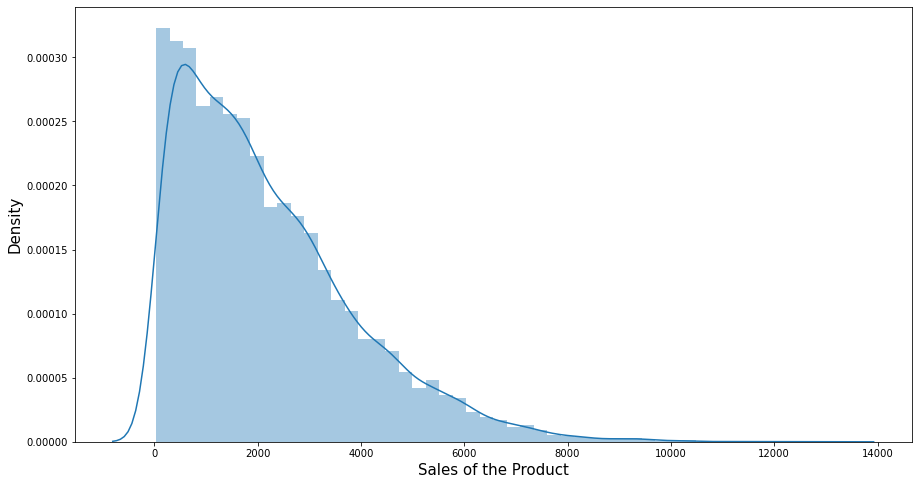

In [116]:


# check the distribution of sales of the product
# ax: create an axes object in the figure
ax = sns.distplot(df_sales['Item_Outlet_Sales'])

# set the label for x-axis
ax.set_xlabel('Sales of the Product', fontsize=15)

# coefficient of skewness 
print('Skewness:', df_sales['Item_Outlet_Sales'].skew())

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

**Interpretation:** It can be seen that the variable is positively skewed with the coefficient of skewness as 1.177. Apply the log transformation to reduce the skewness in the data.

Skewness: -0.887753343209305


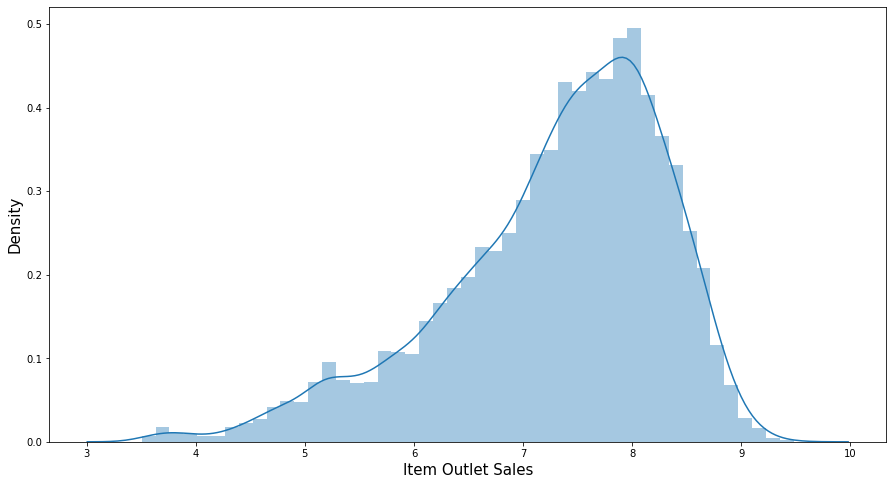

In [117]:


# apply natural log transformation (with base 'e')
np.log(df_sales['Item_Outlet_Sales'])

# coefficient of skewness of transformed data
print('Skewness:', np.log(df_sales['Item_Outlet_Sales']).skew())

# distribution of log_transformed variable
# ax: create an axes object in the figure
ax = sns.distplot(np.log(df_sales['Item_Outlet_Sales']))

# set the label for x-axis
ax.set_xlabel('Item Outlet Sales', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

The coefficient of skewness of the log_transformed data is near zero (-0.89). The distribution plot of the transformed variable is also more interpretable than the plot with original values.

<a id="expo"> </a>
## 5.2 Exponential Transformation

It is inverse of the log transformation. In the analysis, we sometimes may need to change the data to log scale; but for the final interpretation, we need the data in original units. In such cases, exponential transformation is used to take the 'anti-log' of the log-transformed values to get the values on the original scale.

Consider the log-transformed values of `Item_Outlet_Sales`.

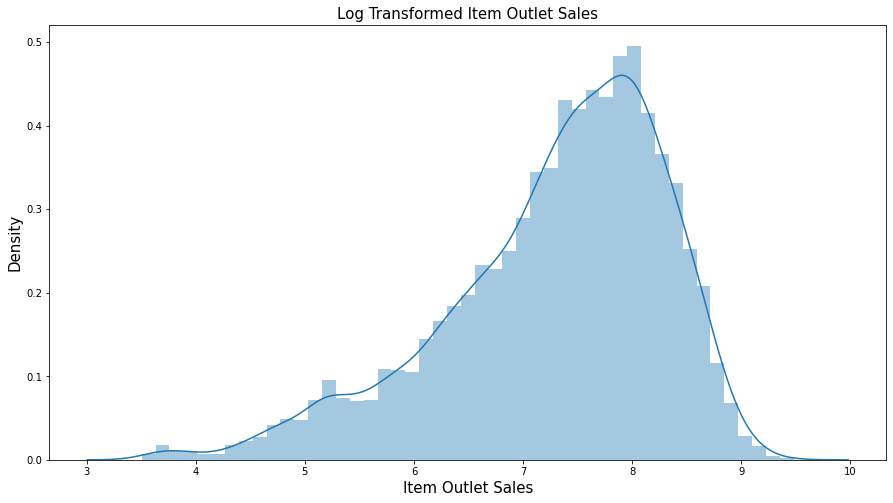

In [118]:
# log_transformed values
log_Item_Outlet_Sales =  np.log(df_sales['Item_Outlet_Sales'])



# plot the distribution
# ax: create an axes object in the figure
ax = sns.distplot(log_Item_Outlet_Sales)

# set the title
plt.title("Log Transformed Item Outlet Sales", fontsize=15)

# set the label for x-axis
ax.set_xlabel('Item Outlet Sales', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

<AxesSubplot:title={'center':'Log Transformed Item Outlet Sales'}, xlabel='Item_Outlet_Sales', ylabel='Density'>

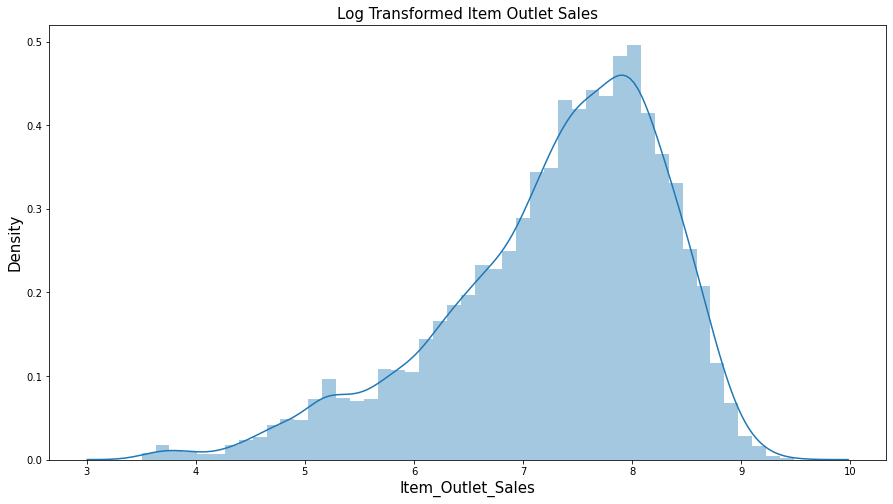

In [119]:
plt.title("Log Transformed Item Outlet Sales", fontsize=15)
plt.xlabel('Item Outlet Sales', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)
sns.distplot(log_Item_Outlet_Sales)

**Interpretation:** In the above plot, x-axis represents the values of outlet sales in the log scale. We want the values on the original scale. Thus, use the exponential transformation to convert the values to the original scale.

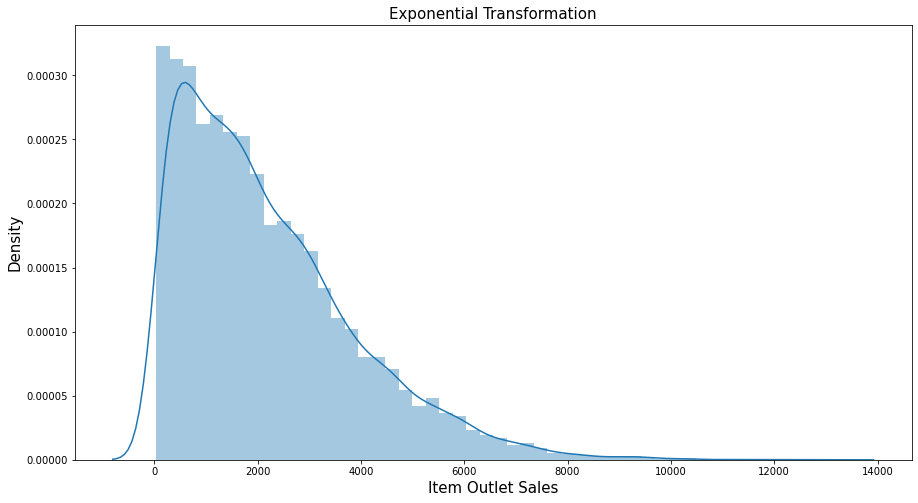

In [120]:
# anti-log of 'log_Item_Outlet_Sales'
Exp_Item_Outlet_Sales = np.exp(log_Item_Outlet_Sales)

# set the figure size
plt.rcParams["figure.figsize"] = [15,8] 

# plot the distribution
# ax: create an axes object in the figure
ax = sns.distplot(Exp_Item_Outlet_Sales)

# set the title
plt.title('Exponential Transformation', fontsize=15)

# set the label for x-axis
ax.set_xlabel('Item Outlet Sales', fontsize=15)

# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

In [121]:
# statistical summary of the data
Exp_Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

After the exponential transformation, we have obtained the values for `Item_Outlet_Sales` in the original units.

#### Let us plot the original values for `Item_Outlet_Sales`, log-transformed `Item_Outlet_Sales`, and exponontial of log-transformed `Item_Outlet_Sales`.

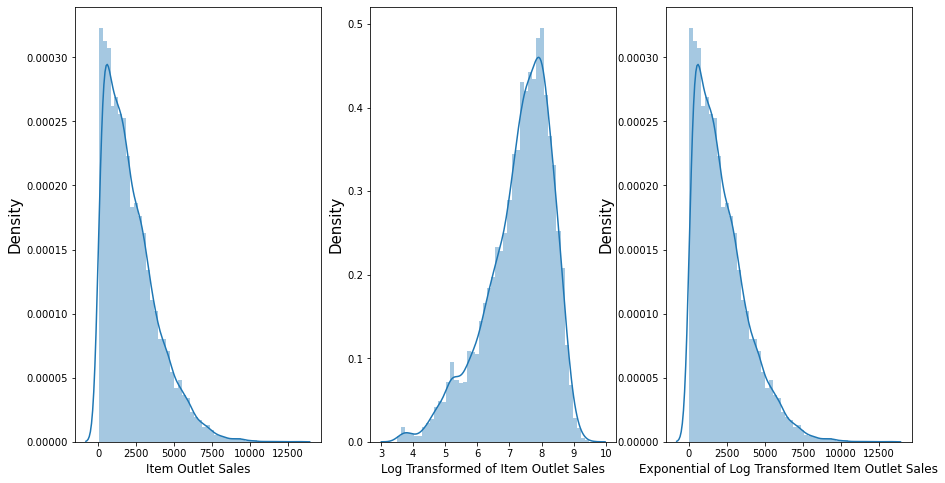

In [122]:
# set the figure size
plt.figure(figsize=(15,8))

# subplot is used to create a set of plots
# we create a subplot of 1 rows by 3 columns 
# use first column for plotting
plt.subplot(1,3,1)

# plot the distribution of original data
sns.distplot(df_sales['Item_Outlet_Sales'])
# set label for x-axis
plt.xlabel('Item Outlet Sales', fontsize=12)
# set label for y-axis
plt.ylabel('Density', fontsize=15)

# we create a subplot of 1 row by 3 columns 
# use second column for plotting
plt.subplot(1,3,2)

# plot the distribution of log-transformed data
sns.distplot(np.log(df_sales['Item_Outlet_Sales']))

# set label for y-axis
plt.ylabel('Density', fontsize=15)
# set label for x-axis
plt.xlabel('Log Transformed of Item Outlet Sales', fontsize=12)

# we create a subplot of 1 row by 3 columns 
# use third column for plotting
plt.subplot(1,3,3)

# plot the distribution of the data after taking exponential of log-transformed data
sns.distplot(Exp_Item_Outlet_Sales)
# set label for x-axis
plt.xlabel('Exponential of Log Transformed Item Outlet Sales', fontsize=12)
# set label for y-axis
plt.ylabel('Density', fontsize=15)

# display the plot
plt.show()

**Interpretation:** It can be observed that the distribution after the exponential transformation of the log-transformed data is the distribution of the original data. Taking the exponential is equivalent to the anti-log of the log-transformed data.

**Remark:**  However, note that to reduce skewness taking transformation may not be feasible always. One can also try to reduce skewness by removing the outliers. The outlier treatment shall be dealt with the later session.

In [123]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
df_sales_zscore = df_sales["Profit"][~(( z_scores_Profit < -3) |(z_scores_Profit > 3))]

In [124]:
df_sales_zscore_and = df_sales["Profit"][~(( z_scores_Profit < -3) & (z_scores_Profit > 3))]

In [125]:
df_sales_zscore_and.shape

(8523,)

In [126]:
df_sales_zscore.shape

(8324,)

In [127]:
z_scores_Profit < -3

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Profit, Length: 8523, dtype: bool

In [128]:
z_scores_Profit[( z_scores_Profit < -3) |(z_scores_Profit > 3)]

41     -3.828149
50     -3.534332
144    -3.358042
217    -6.002394
320    -7.765296
          ...   
8376   -4.063202
8395   -3.710622
8429   -5.473524
8433   -7.824059
8456   -3.005461
Name: Profit, Length: 199, dtype: float64

## Other transformation techniques:
- squareroot transformation
- reciprocal transformation
- power transformation( box-cox and 

### Square root transformation

In [129]:
df_sales['Item_Outlet_Sales'].skew()

1.1775306028542796

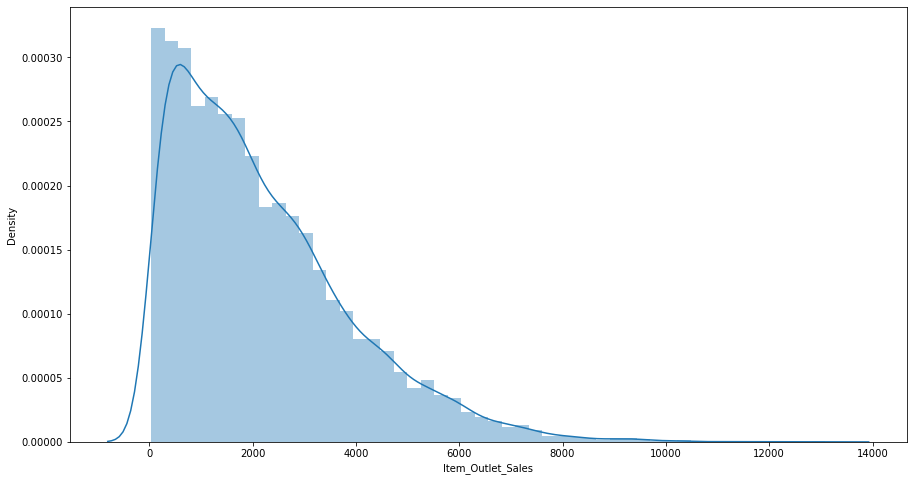

In [130]:
sns.distplot(df_sales['Item_Outlet_Sales']);

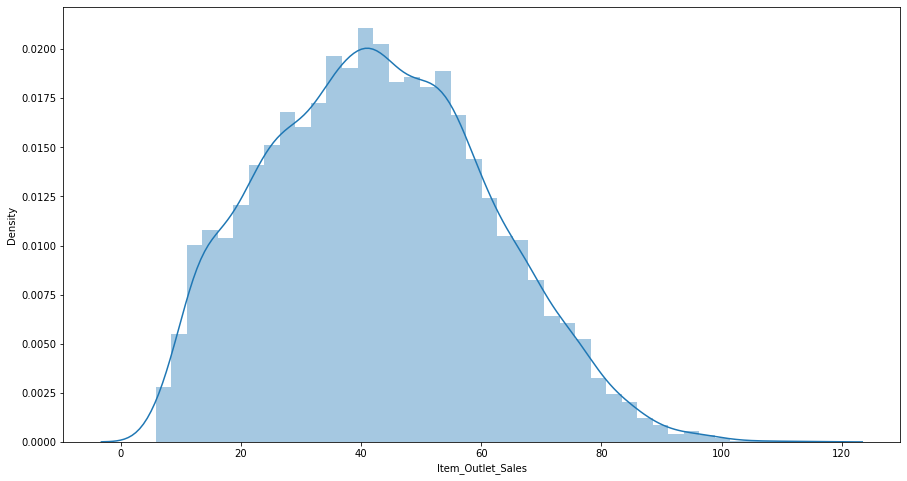

In [131]:
sns.distplot(np.sqrt(df_sales['Item_Outlet_Sales']));

In [132]:
np.sqrt(df_sales['Item_Outlet_Sales']).skew()

0.23467599347099255

### Reciprocal transformation

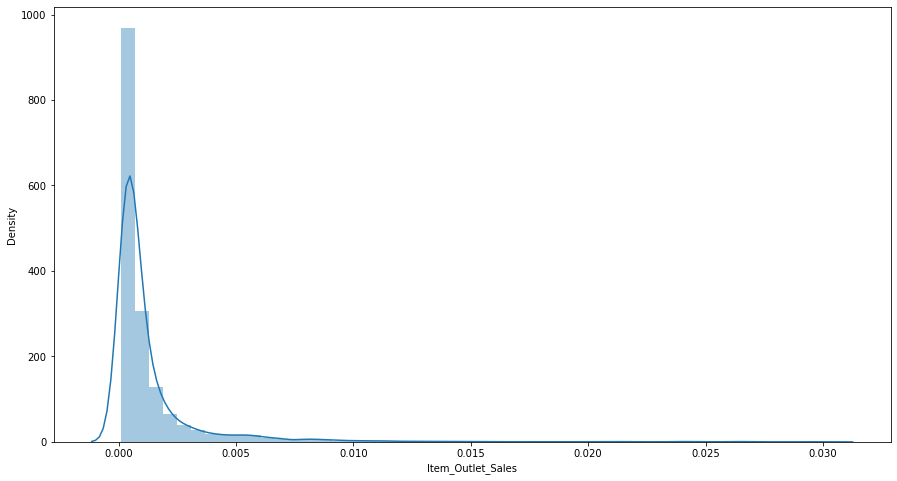

In [133]:
sns.distplot(1/(df_sales['Item_Outlet_Sales']));

In [134]:
1/(df_sales['Item_Outlet_Sales']).skew()

0.8492348288664824

### Power transformation

In [135]:
from sklearn.preprocessing import PowerTransformer

In [136]:
pt=PowerTransformer(method="box-cox")

In [137]:
pt.fit_transform(df_sales['Item_Outlet_Sales']).skew()

ValueError: Expected 2D array, got 1D array instead:
array=[3735.138   443.4228 2097.27   ... 1193.1136 1845.5976  765.67  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.